In [48]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('../data/input/venezia_mean.csv', delimiter=';')
data

,Index,Date,Value
0,0,1983-01-01 01:00:00,6.333333
1,1,1983-01-02 01:00:00,8.208333
2,2,1983-01-03 01:00:00,6.458333
3,3,1983-01-04 01:00:00,7.666667
4,4,1983-01-05 01:00:00,7.958333
...,...,...,...
12048,12048,2015-12-27 01:00:00,7.291667
12049,12049,2015-12-28 01:00:00,4.541667
12050,12050,2015-12-29 01:00:00,3.625000
12051,12051,2015-12-30 01:00:00,12.250000


In [50]:
x_all = data['Value'].values
x_all = x_all / x_all.max()
x_all

array([0.0610687 , 0.07914825, 0.06227401, ..., 0.0349538 , 0.11811973,
       0.12133387])

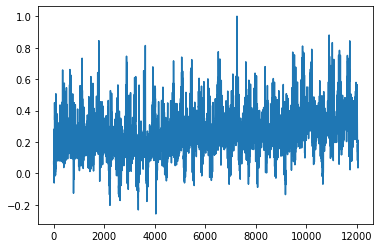

In [51]:
plt.plot(x_all)

In [52]:
train = x_all[:10000]
test = x_all[10000:]

In [53]:
m = 10
lst_inputs = []

for i in range(train.shape[0] - m):
    lst_inputs.append(train[i:m+i])

x_train = np.array(lst_inputs)

lst_test_inputs = []

for i in range(test.shape[0] - m):
    lst_test_inputs.append(test[i:m+i])

x_test = np.array(lst_test_inputs)

y_train = train[m:train.shape[0]]
y_test = test[m:test.shape[0]]

x_train.shape, x_test.shape

((9990, 10), (2043, 10))

In [54]:
import tensorflow as tf

masking_layer = keras.layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_train, axis=1), [1, 1, 1]),
    tf.float32
)

x_train_masked = masking_layer(unmasked_embedding)

masking_layer = keras.layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_test, axis=1), [1, 1, 1]),
    tf.float32
)

x_test_masked = masking_layer(unmasked_embedding)
x_train_masked.shape

TensorShape([9990, 1, 10])

In [55]:
from tensorflow.keras import layers

model = keras.Sequential(name='RNN')
model.add(layers.SimpleRNN(m, activation='tanh', input_dim=m))
model.add(layers.Dense(2*m+1, activation='sigmoid'))
model.add(layers.Dense(1, activation=tf.nn.leaky_relu))

model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_13 (Dense)             (None, 21)                231       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 22        
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.7),
    loss=keras.losses.MeanSquaredError(),
    metrics=keras.metrics.Accuracy()
)

Epoch 1/10
999/999 [==============================] - 1s 1ms/step - loss: 0.0333 - accuracy: 0.0000e+00 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 2/10
999/999 [==============================] - 2s 2ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 3/10
999/999 [==============================] - 2s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 4/10
999/999 [==============================] - 2s 2ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 5/10
999/999 [==============================] - 2s 2ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 6/10
999/999 [==============================] - 1s 1ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 7/10
999/999 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.0000e

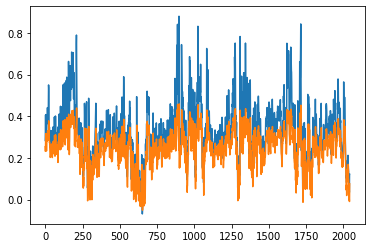

In [57]:
ep = 10

model.fit(
    x=x_train_masked,
    y=y_train,
    batch_size=10,
    epochs=ep,
    validation_data=(x_test_masked, y_test)
)

y = model.predict(x_test_masked)

plt.plot(y_test)
plt.plot(y)

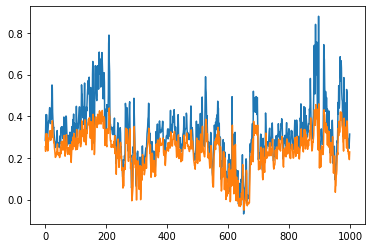

In [62]:
plt.plot(y_test[:1000])
plt.plot(y[:1000])